In [14]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def rotate(x,y,θ,origin):
    θ = math.radians(θ)
    x_ = x * math.cos(θ) - y * math.sin(θ)
    y_ = x * math.sin(θ) + y * math.cos(θ)
    x_ += origin[0]; y_ += origin[1]
    return x_,y_

def line(p1, p2):
    a = (p1[1] - p2[1])
    b = (p2[0] - p1[0])
    c = (p1[0]*p2[1] - p2[0]*p1[1])
    return a, b, -c

def line_intersection(l1, l2):
    D  = l1[0] * l2[1] - l1[1] * l2[0]
    Dx = l1[2] * l2[1] - l1[1] * l2[2]
    Dy = l1[0] * l2[2] - l1[2] * l2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False

def error_calc(pt1,pt2,origin):
    def arc(pt,origin):
        o = np.linalg.norm(np.array([pt1[0],origin[1]])-np.array([pt1[0],pt1[1]]))
        h = np.linalg.norm(np.array([origin[0],origin[1]])-np.array([pt1[0],pt1[1]]))
        max_θ = np.arcsin(o/h)*0.5
        return math.degrees(max_θ)
    max1_θ = arc(pt1,origin)
    max2_θ = arc(pt2,origin)
    return max1_θ,max2_θ

In [16]:
ou = 5
mirror_size = 2
laser_origin = [ou,-20]
seglen = 1000
las_w = 3

dist = 25
m1_center = [ou,ou]
m2_center = [dist+m1_center[0],ou]
m1_θ = 30#3.78*0.5
m2_θ = -30

pinhole = True
pinhole_size = 0.1
pinhole_dist = 10
pinhole_center = [ou+pinhole_dist,ou]
pinhole_edge=(mirror_size/2)-pinhole_size

plt.rcParams['figure.figsize'] = [15, 2]

In [17]:
## mirror distance, mirror size, θ mirror 1, θ mirror 2, pinhole toggle, pinhole distance, pinhole size
def refresh(dist,mirror_size,m1_θ,m2_θ,pinhole,pinhole_dist,pinhole_size):
    if m1_θ >= 90 or m1_θ < 1:
        print("Angle of mirror 1 must be between 1-89")
        return
    if m2_θ <= -90 or m2_θ > -1:
        print("Angle of mirror 2 must be between -1 and -89")
        return
    
    pinhole_pass = False; mirror2_pass=False
    m2_center = [dist+m1_center[0],ou]
    m1_x1,m1_y1=rotate(-mirror_size/2,0,m1_θ,m1_center)
    m1_x2,m1_y2=rotate(mirror_size/2,0,m1_θ,m1_center)

    m2_x1,m2_y1=rotate(-mirror_size/2,0,m2_θ,m2_center)
    m2_x2,m2_y2=rotate(mirror_size/2,0,m2_θ,m2_center)

    refl_θ_1 = math.radians(90-((90-m1_θ)*2))
    refl_path_1 = [math.cos(refl_θ_1)*seglen + m1_center[0],math.sin(refl_θ_1)*seglen + m1_center[1]]

    line1 = line([m1_center[0],m1_center[1]],[refl_path_1[0],refl_path_1[1]])
    line2 = line([m2_x1,m2_y1],[m2_x2,m2_y2])
    intercept_x,intercept_y = line_intersection(line1,line2)

    refl_θ_2 = 2*math.radians(m2_θ) - refl_θ_1
    refl_path_2 = [math.cos(refl_θ_2)*seglen + intercept_x,math.sin(refl_θ_2)*seglen + intercept_y]
    ax = sns.scatterplot(x=[laser_origin[0]],y=[laser_origin[1]],color="red",s=50)

    if pinhole == True:
        ax.text(ou+pinhole_dist-0.5,ou+pinhole_size+pinhole_edge,'Pinhole',fontsize=10)
        pinline = line([ou+pinhole_dist,ou-(pinhole_size/2)],[ou+pinhole_dist,ou+(pinhole_size/2)])
        pintercept_x,pintercept_y = line_intersection(line1,pinline)
        if pintercept_y <= ou+(pinhole_size/2) and pintercept_y >= ou-(pinhole_size/2):
            pinhole_pass = True
        pt1 = [ou+pinhole_dist,ou-(pinhole_size/2)]
        pt2 = [ou+pinhole_dist,ou+(pinhole_size/2)]
        ax.vlines(pt1[0],pt1[1],pt1[1]-pinhole_edge,color="blue",lw=3)
        ax.vlines(pt2[0],pt2[1],pt2[1]+pinhole_edge,color="blue",lw=3)
        ax.vlines(pt1[0],pt2[1],pt1[1],color="pink",lw=3)
        sns.lineplot(x=[m1_center[0],ou+pinhole_dist],y=[m1_center[1],ou-(pinhole_size/2)],color="green")
        sns.lineplot(x=[m1_center[0],ou+pinhole_dist],y=[m1_center[1],ou-(pinhole_size/2)],color="green")
        err=(error_calc(pt1,pt2,m1_center))
        print("Error tolerance for pinhole size {:.2f}cm at distance {:d}cm is {:.2f}°".format(pinhole_size,pinhole_dist,err[0]))

    sns.lineplot(x=[m1_x1,m1_x2],y=[m1_y1,m1_y2],linewidth=2,color="black")
    sns.scatterplot(x=[m1_center[0]],y=[m1_center[1]],color="black")

    sns.lineplot(x=[m2_x1,m2_x2],y=[m2_y1,m2_y2],linewidth=2,color="black")
    sns.scatterplot(x=[m2_center[0]],y=[m2_center[1]],color="black")

    ### Put in our error tracks here
    sns.lineplot(x=[m1_center[0],m2_x2],y=[m1_center[1],m2_y2],linewidth=1,color="green")
    sns.lineplot(x=[m1_center[0],m2_x1],y=[m1_center[1],m2_y1],linewidth=1,color="green")

    pt1 = [m2_x2,m2_y2]
    pt2 = [m2_x1,m2_y1]
    err = error_calc(pt1,pt2,m1_center)
    print("Error tolerance to hit mirror 2 at size {:d}cm and distance {:d}cm is {:.2f}°".format(int(mirror_size),dist,err[0]))

    if intercept_y >= m2_y2 and intercept_y <= m2_y1:
        sns.lineplot(x=[m1_center[0],intercept_x],y=[m1_center[1],intercept_y],linewidth=las_w,color="red")
        sns.lineplot(x=[intercept_x,refl_path_2[0]],y=[intercept_y,refl_path_2[1]],linewidth=las_w,color="red")
    else:
        mirror2_pass = False
        sns.lineplot(x=[m1_center[0],refl_path_1[0]],y=[m1_center[1],refl_path_1[1]],linewidth=2,color="pink")

    sns.scatterplot(x=[m2_center[0]],y=[3],color="black",s=100)
    ax.vlines(x=laser_origin[0],ymin = laser_origin[1],ymax = m1_center[1],lw=las_w,color="red")
    ax.text(laser_origin[0]-1, 2,'Laser Origin', fontsize=10)
    ax.text(m2_center[0]-0.3,2,'Target',fontsize=10)
    ax.set(xlim=(0,(dist+mirror_size+5+m1_center[0])))
    ax.set(ylim=(3,mirror_size+m1_center[1]))
    print("Mirror 1 θ: {:.2f}, Mirror 2 θ: {:.2f}".format(m1_θ,m2_θ))
    plt.show()

## Example Simulations
Given two mirrors, we can control the __position__ and the __angle__ of the beam. 

For the sake of simplicity, in these examples the position of the incoming beam relative to the mirror is fixed.

The black lines represent mirrors that can be positioned between 1-89°. The red line represents the beam. Green line represent the maximum divergence from 45° that the incoming beam from Mirror 1 could take before it would no longer be propagated (eg missing the mirror, or encountering a non-reflective surface). If enabled, the blue lines represent a pinhole iris.

__note: although the angle of the mirrors in the plot may appear to change, this is only due to scaling to fit the page. All underlying calculations are based on user input.__

First, let's take this example of the ideal scenario. The two mirrors (2cm) are perfectly aligned, positioned 10cm apart, so the beam will hit its target.

Error tolerance to hit mirror 2 at size 2cm and distance 10cm is 1.89°
Mirror 1 θ: 45.00, Mirror 2 θ: -45.00


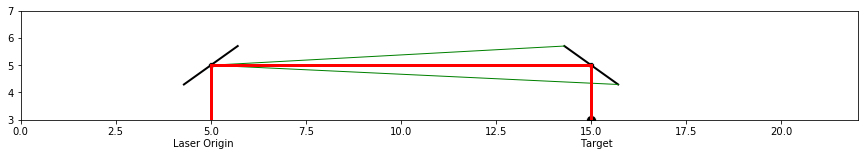

In [18]:
## mirror distance, mirror size, θ mirror 1, θ mirror 2, pinhole toggle, pinhole distance, pinhole size
refresh(10,2,45,-45,False,5,0.5)

At this distance, there is tolerance for approx 1.89° of error. For rexample, if we change the angle of the first mirror by 1°, we'll still hit the second mirror, but we won't hit our target.

If we change the angle of the first mirror by 5°, we are way off and won't hit the second mirror at all.

Error tolerance to hit mirror 2 at size 2cm and distance 10cm is 1.89°
Mirror 1 θ: 46.00, Mirror 2 θ: -45.00


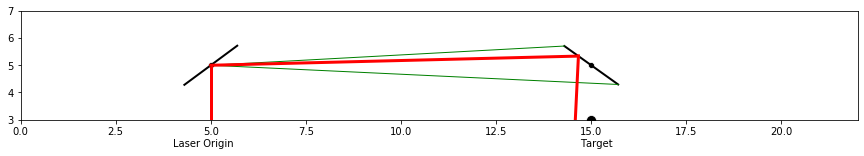

Error tolerance to hit mirror 2 at size 2cm and distance 10cm is 1.89°
Mirror 1 θ: 50.00, Mirror 2 θ: -45.00


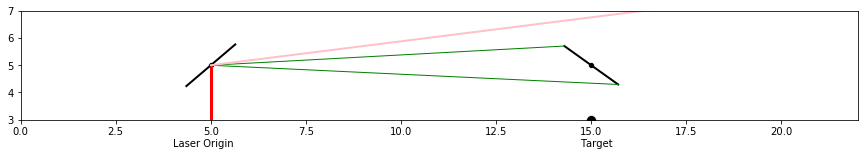

In [19]:
refresh(10,2,46,-45,False,5,0.5)
refresh(10,2,50,-45,False,5,0.5)

As we have discussed, if the second mirror is moved further away, the potential maximum error is reduced. As you would expect, this 1° deviation means the beam does not hit the second mirror, and does not propagate.

Error tolerance to hit mirror 2 at size 2cm and distance 100cm is 0.20°
Mirror 1 θ: 45.00, Mirror 2 θ: -45.00


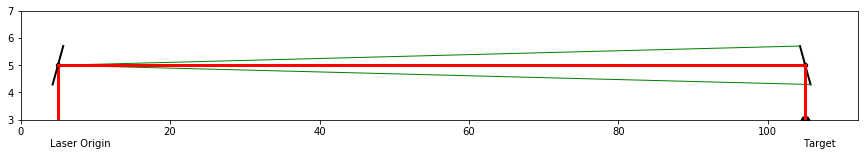

Error tolerance to hit mirror 2 at size 2cm and distance 100cm is 0.20°
Mirror 1 θ: 46.00, Mirror 2 θ: -45.00


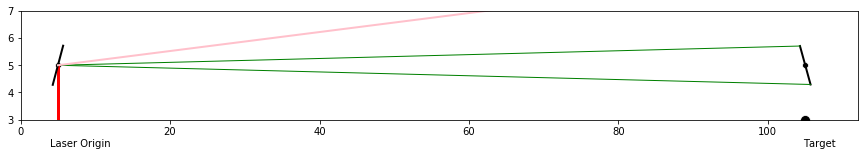

In [20]:
refresh(100,2,45,-45,False,5,0.1)
refresh(100,2,46,-45,False,5,0.1)

However, because of the drawbacks of increased distance, it is advantageous to use a different technique to achieve the same precision while positioning elements more closely together. If we place a __pinhole iris__ in the path of the original setup, we can precisely control the maximum error of the beam from Mirror 1 using similar principles:

Error tolerance for pinhole size 0.50cm at distance 5cm is 1.43°
Error tolerance to hit mirror 2 at size 2cm and distance 10cm is 1.89°
Mirror 1 θ: 45.00, Mirror 2 θ: -45.00


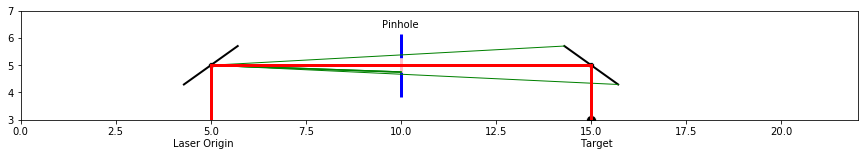

In [21]:
refresh(10,2,45,-45,True,5,0.5)

Even with the pinhole mostly open, we can see improvements. However, if the pinhole iris is closed (we have pinholes with a minimum diameter of 1mm), we can achieve a smaller maximum error without moving the mirrors.

Error tolerance for pinhole size 0.10cm at distance 5cm is 0.29°
Error tolerance to hit mirror 2 at size 2cm and distance 10cm is 1.89°
Mirror 1 θ: 45.00, Mirror 2 θ: -45.00


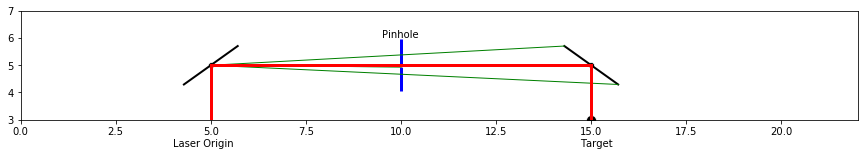

In [22]:
refresh(10,2,45,-45,True,5,0.1)

Positioning the pinhole closer to the second mirror (or using several pinholes in sequence) can improve this further. A pinhole located at 7cm from the first mirror is equivalent to placing the second mirror 1 meter away. In this case, with even a 0.3° deviation the beam does not propagate.

Error tolerance for pinhole size 0.10cm at distance 7cm is 0.20°
Error tolerance to hit mirror 2 at size 2cm and distance 100cm is 0.20°
Mirror 1 θ: 45.00, Mirror 2 θ: -45.00


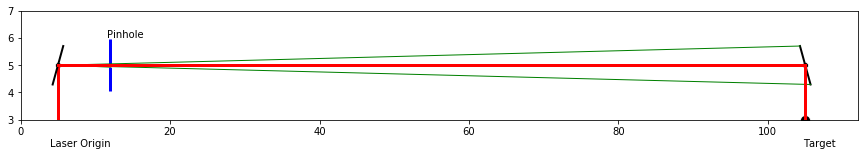

Error tolerance for pinhole size 0.10cm at distance 7cm is 0.20°
Error tolerance to hit mirror 2 at size 2cm and distance 100cm is 0.20°
Mirror 1 θ: 45.30, Mirror 2 θ: -45.00


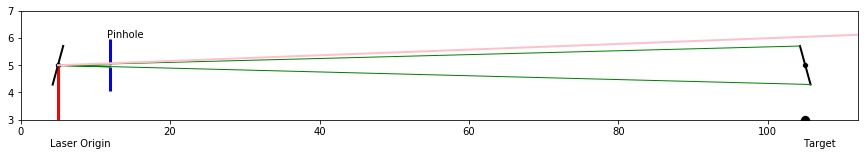

In [23]:
refresh(100,2,45,-45,True,7,0.1)
refresh(100,2,45.3,-45,True,7,0.1)